<a href="https://colab.research.google.com/github/youngjon2001/Heart-disease-prediction/blob/main/Heart_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
# import the dataset
df_train = pd.read_csv("/content/drive/MyDrive/train (1).csv")
print(df_train)

df_test = pd.read_csv("/content/drive/MyDrive/test (1).csv")
print(df_test)

df_submission = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

            id  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0            0   58    1                4  152          239             0   
1            1   52    1                1  125          325             0   
2            2   56    0                2  160          188             0   
3            3   44    0                3  134          229             0   
4            4   58    1                4  140          234             0   
...        ...  ...  ...              ...  ...          ...           ...   
629995  629995   56    0                1  110          226             0   
629996  629996   54    1                4  128          249             1   
629997  629997   67    1                4  130          275             0   
629998  629998   52    1                4  140          199             0   
629999  629999   51    0                2  130          199             0   

        EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \

In [43]:
# remove white spaces from the columns
df_train = df_train.rename(columns=lambda x: x.strip())
df_train

df_test = df_test.rename(columns=lambda x: x.strip())
df_test

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,899995,58,1,2,120,222,0,0,172,0,1.0,1,0,7
269996,899996,58,1,4,132,289,0,0,172,0,2.8,2,0,3
269997,899997,63,1,3,108,201,1,0,158,0,0.8,1,0,3
269998,899998,59,1,4,120,274,0,2,163,0,0.5,1,0,3


In [46]:
# checking for solumns
df_train.columns
print(df_train.columns)

df_test.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')


Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [44]:
# checking for duplicates

df_train.duplicated().sum()

df_test.duplicated().sum()

np.int64(0)

In [6]:
# check for information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [7]:
# checking for missing variable
df_train.isnull().sum()

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0


In [8]:
# doing descriptive statistics
df_train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [9]:
# checking for class imbalance of the target variable
df_train['Heart Disease'].value_counts()
print('The count of heart disease:', df_train['Heart Disease'].value_counts() )

# checking for it in percentages
df_train['Heart Disease'].value_counts(normalize=True)

The count of heart disease: Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64


,proportion
Heart Disease,
Absence,0.55166
Presence,0.44834


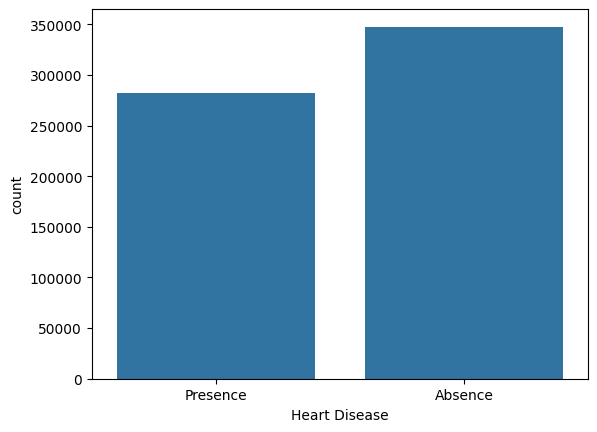

In [10]:
# visualizing the count of heart disease
sns.countplot(x='Heart Disease', data=df_train)
plt.show()

From the above dataset you can see that between the values  of the target variable is has not alot of imbalances.

In [11]:
# Drop identifier
drop_cols = ['id']

# Target
target = 'Heart Disease'

# Numerical features
num_features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

# Binary categorical features
bin_features = [
    'Sex',
    'FBS over 120',
    'Exercise angina'
]

# Ordinal categorical features
ord_features = [
    'Slope of ST',
    'EKG results'
]

# Nominal categorical features
nom_features = [
    'Chest pain type',
    'Thallium'
]


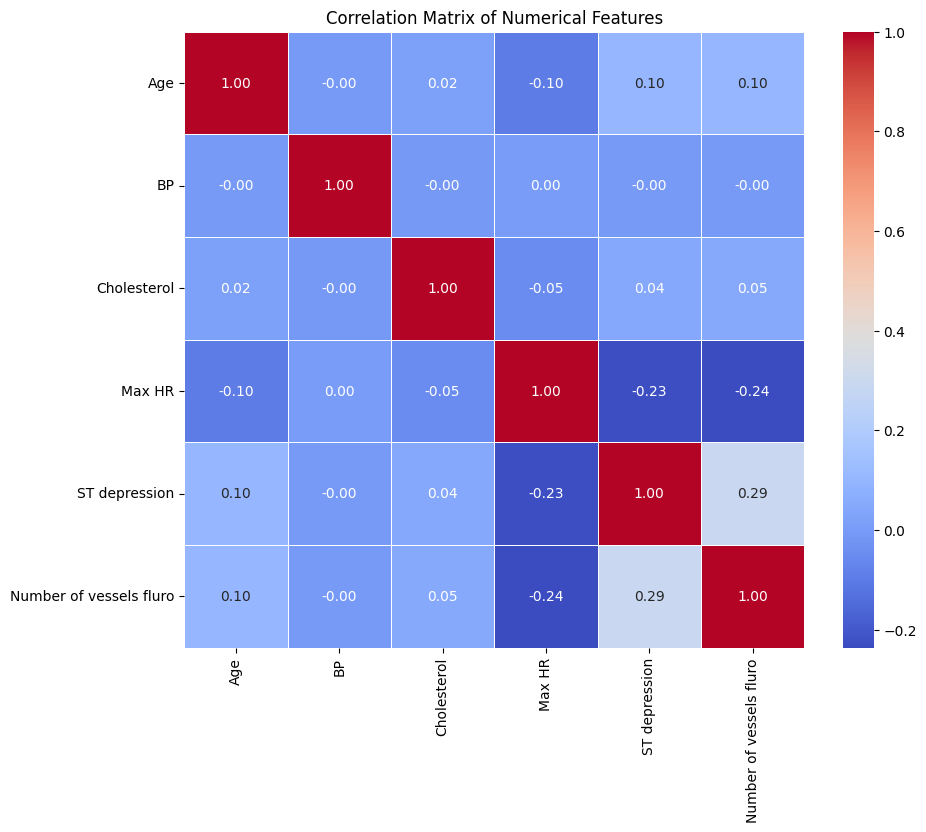

In [12]:
# visualizing the correlation the numerical variable using heatmap
# Compute correlation matrix
correlation_matrix = df_train[num_features].corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# Absolute correlation values
abs_corr = correlation_matrix.abs()

# Keep upper triangle only (remove duplicates + self-correlation)
upper_triangle = abs_corr.where(
    np.triu(np.ones(abs_corr.shape), k=1).astype(bool)
)

# Unstack, sort, and drop NaNs
strongest_correlations = (
    upper_triangle
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)

# Top 5 strongest correlations
print("Top 5 strongest absolute correlations among numerical features:")
print(strongest_correlations.head(5))



Top 5 strongest absolute correlations among numerical features:
Number of vessels fluro  ST depression    0.293642
                         Max HR           0.236319
ST depression            Max HR           0.229462
                         Age              0.103064
Number of vessels fluro  Age              0.102758
dtype: float64


Numerical features exhibit low inter-correlation, suggesting they provide largely independent information for predictive modeling.

In [14]:
# correlation for cholesterol

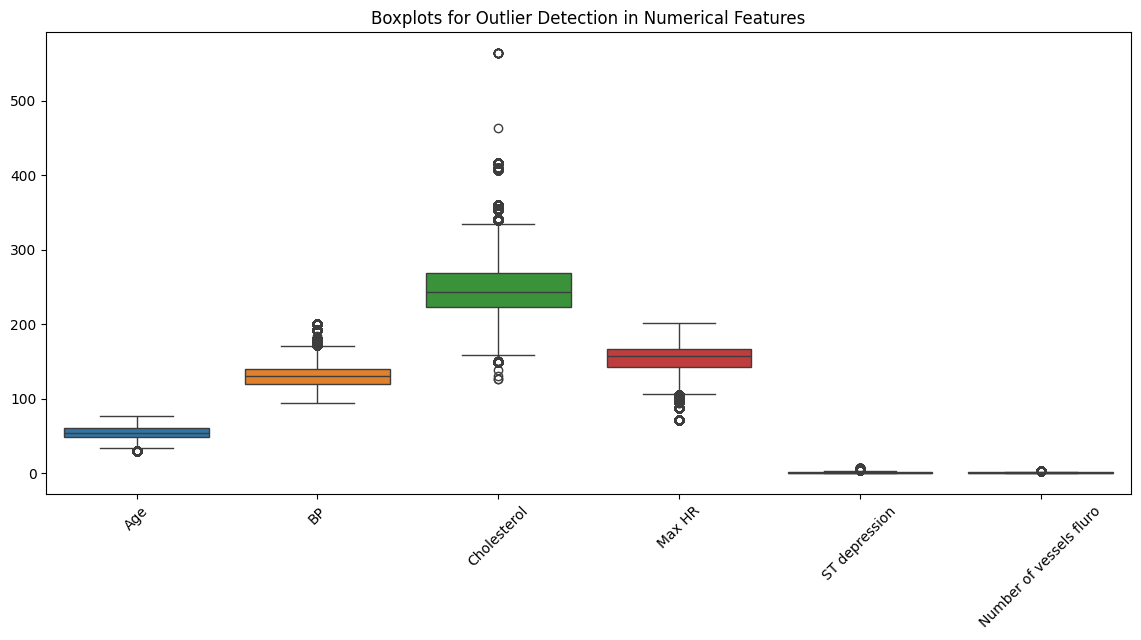

In [15]:
# Checking for outliers using boxplot
num_features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_train[num_features])
plt.xticks(rotation=45)
plt.title('Boxplots for Outlier Detection in Numerical Features')
plt.show()

Age: The 'Age' distribution appears relatively symmetrical, with a few outliers on the lower age range, indicating some younger individuals outside the typical age distribution.

BP (Blood Pressure): 'BP' shows a number of outliers on both the lower and higher ends, suggesting some individuals have unusually low or high blood pressure compared to the majority.

Cholesterol: This feature exhibits a substantial number of outliers on the higher end, indicating several individuals with significantly elevated cholesterol levels.

Max HR (Maximum Heart Rate): 'Max HR' also displays outliers on both the lower and higher ends, pointing to some individuals with unusually low or high maximum heart rates.

ST depression: There are many outliers on the higher end for 'ST depression', which means several patients experienced notably high levels of ST depression. This is an important clinical indicator.

Number of vessels fluro: This feature shows some outliers, particularly on the higher side, suggesting a few individuals with a higher number of major vessels colored by fluoroscopy than the typical patient.

In summary, most of the numerical features contain outliers, particularly on the higher end, which is common in medical datasets. These outliers should be carefully considered during further analysis and model building, as they can significantly impact statistical measures and model performance.

In [16]:
# carrying crosstab analysis on categorical variable

# Categorical features
cat_features = [
    'Sex',
    'FBS over 120',
    'Exercise angina',
    'Chest pain type',
    'Thallium',
    'Slope of ST',
    'EKG results'
]

for col in cat_features:
    print(f"\nCrosstab: {col} vs Heart Disease")
    ct = pd.crosstab(df_train[col], df_train['Heart Disease'], margins=True, normalize='index')
    print(ct)



Crosstab: Sex vs Heart Disease
Heart Disease   Absence  Presence
Sex                              
0              0.821236  0.178764
1              0.444067  0.555933
All            0.551660  0.448340

Crosstab: FBS over 120 vs Heart Disease
Heart Disease   Absence  Presence
FBS over 120                     
0              0.556583  0.443417
1              0.495039  0.504961
All            0.551660  0.448340

Crosstab: Exercise angina vs Heart Disease
Heart Disease     Absence  Presence
Exercise angina                    
0                0.686567  0.313433
1                0.193712  0.806288
All              0.551660  0.448340

Crosstab: Chest pain type vs Heart Disease
Heart Disease     Absence  Presence
Chest pain type                    
1                0.891931  0.108069
2                0.837819  0.162181
3                0.809335  0.190665
4                0.302522  0.697478
All              0.551660  0.448340

Crosstab: Thallium vs Heart Disease
Heart Disease   Absence  Prese

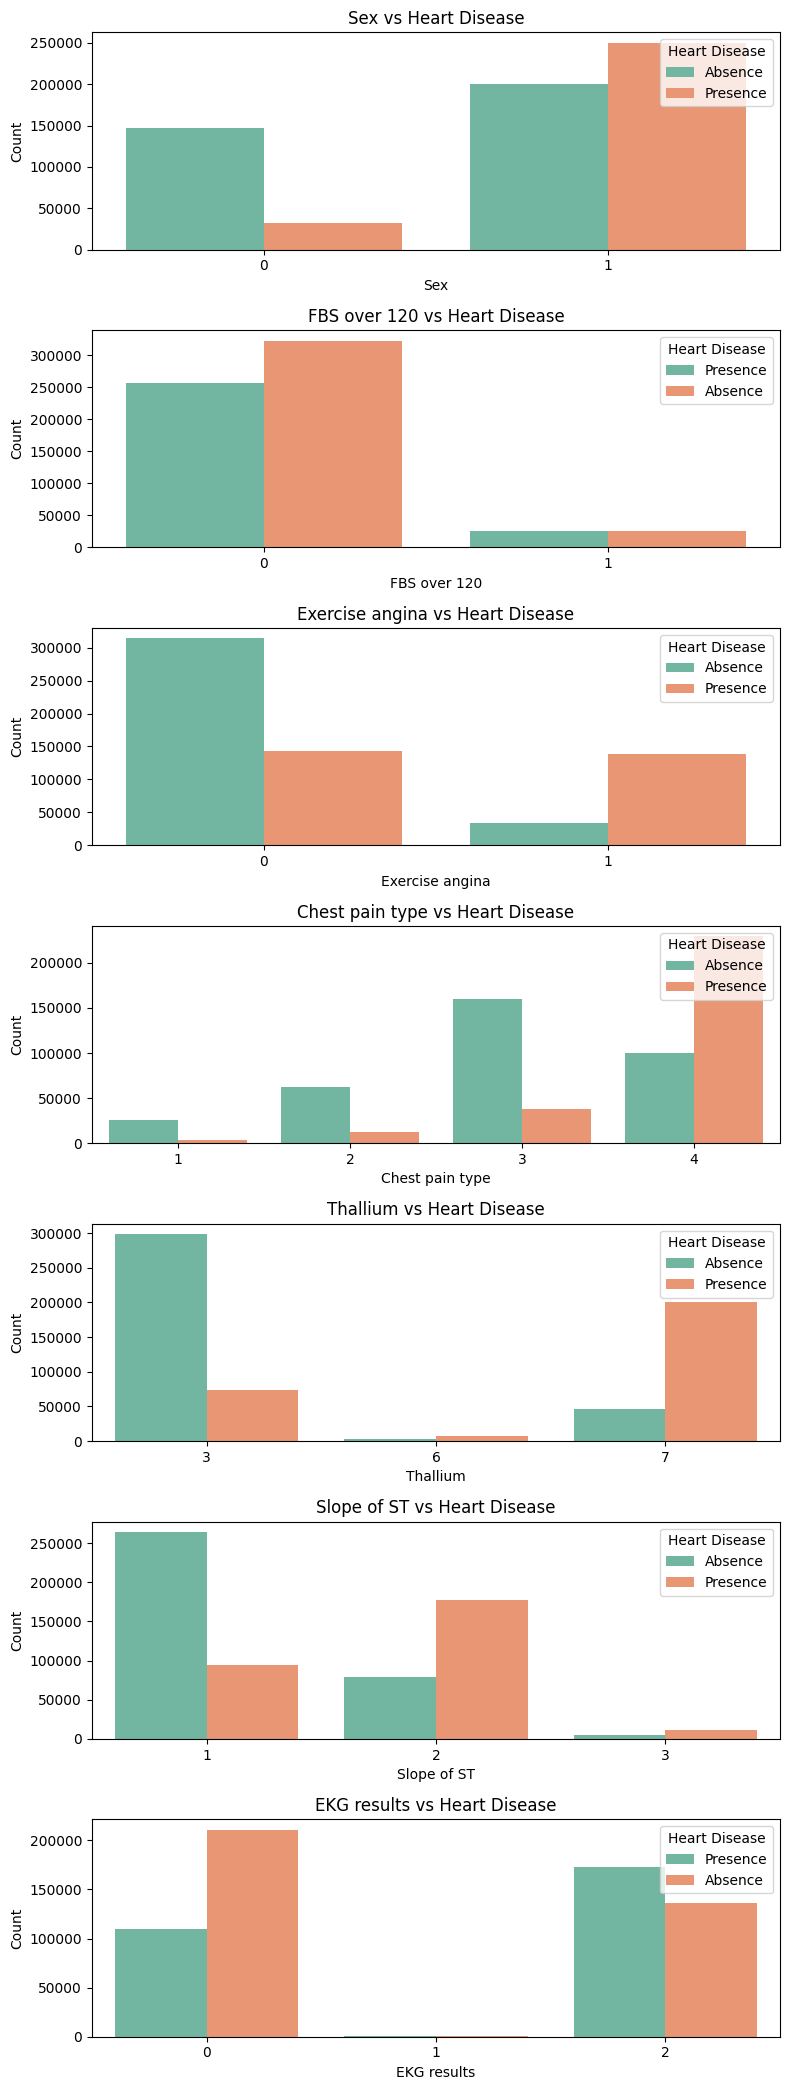

In [17]:

# Categorical features
cat_features = [
    'Sex',
    'FBS over 120',
    'Exercise angina',
    'Chest pain type',
    'Thallium',
    'Slope of ST',
    'EKG results'
]

# Set up figure grid
n_features = len(cat_features)
fig, axes = plt.subplots(n_features, 1, figsize=(8, n_features*3))

# Loop through features and plot barplots
for i, feature in enumerate(cat_features):
    sns.countplot(
        data=df_train,
        x=feature,
        hue='Heart Disease',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{feature} vs Heart Disease')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(feature)
    axes[i].legend(title='Heart Disease', loc='upper right')

plt.tight_layout()
plt.show()


| Feature         | Observation                                                       |
| --------------- | ----------------------------------------------------------------- |
| Sex             | Males (1) have 56% presence; females (0) 18% → moderate predictor |
| FBS over 120    | Minimal difference (50% vs 44%) → weak predictor                  |
| Exercise angina | Presence = 81% vs 31% absence → **strong predictor**              |
| Chest pain type | Type 4 → 70% presence; Types 1-3 → 11-19% → **strong predictor**  |
| Thallium        | Values 6 & 7 → 69-82% presence → **strong predictor**             |
| Slope of ST     | Values 2 & 3 → 69-72% presence → **good predictor**               |
| EKG results     | Value 2 → 56% presence → moderate predictor                       |


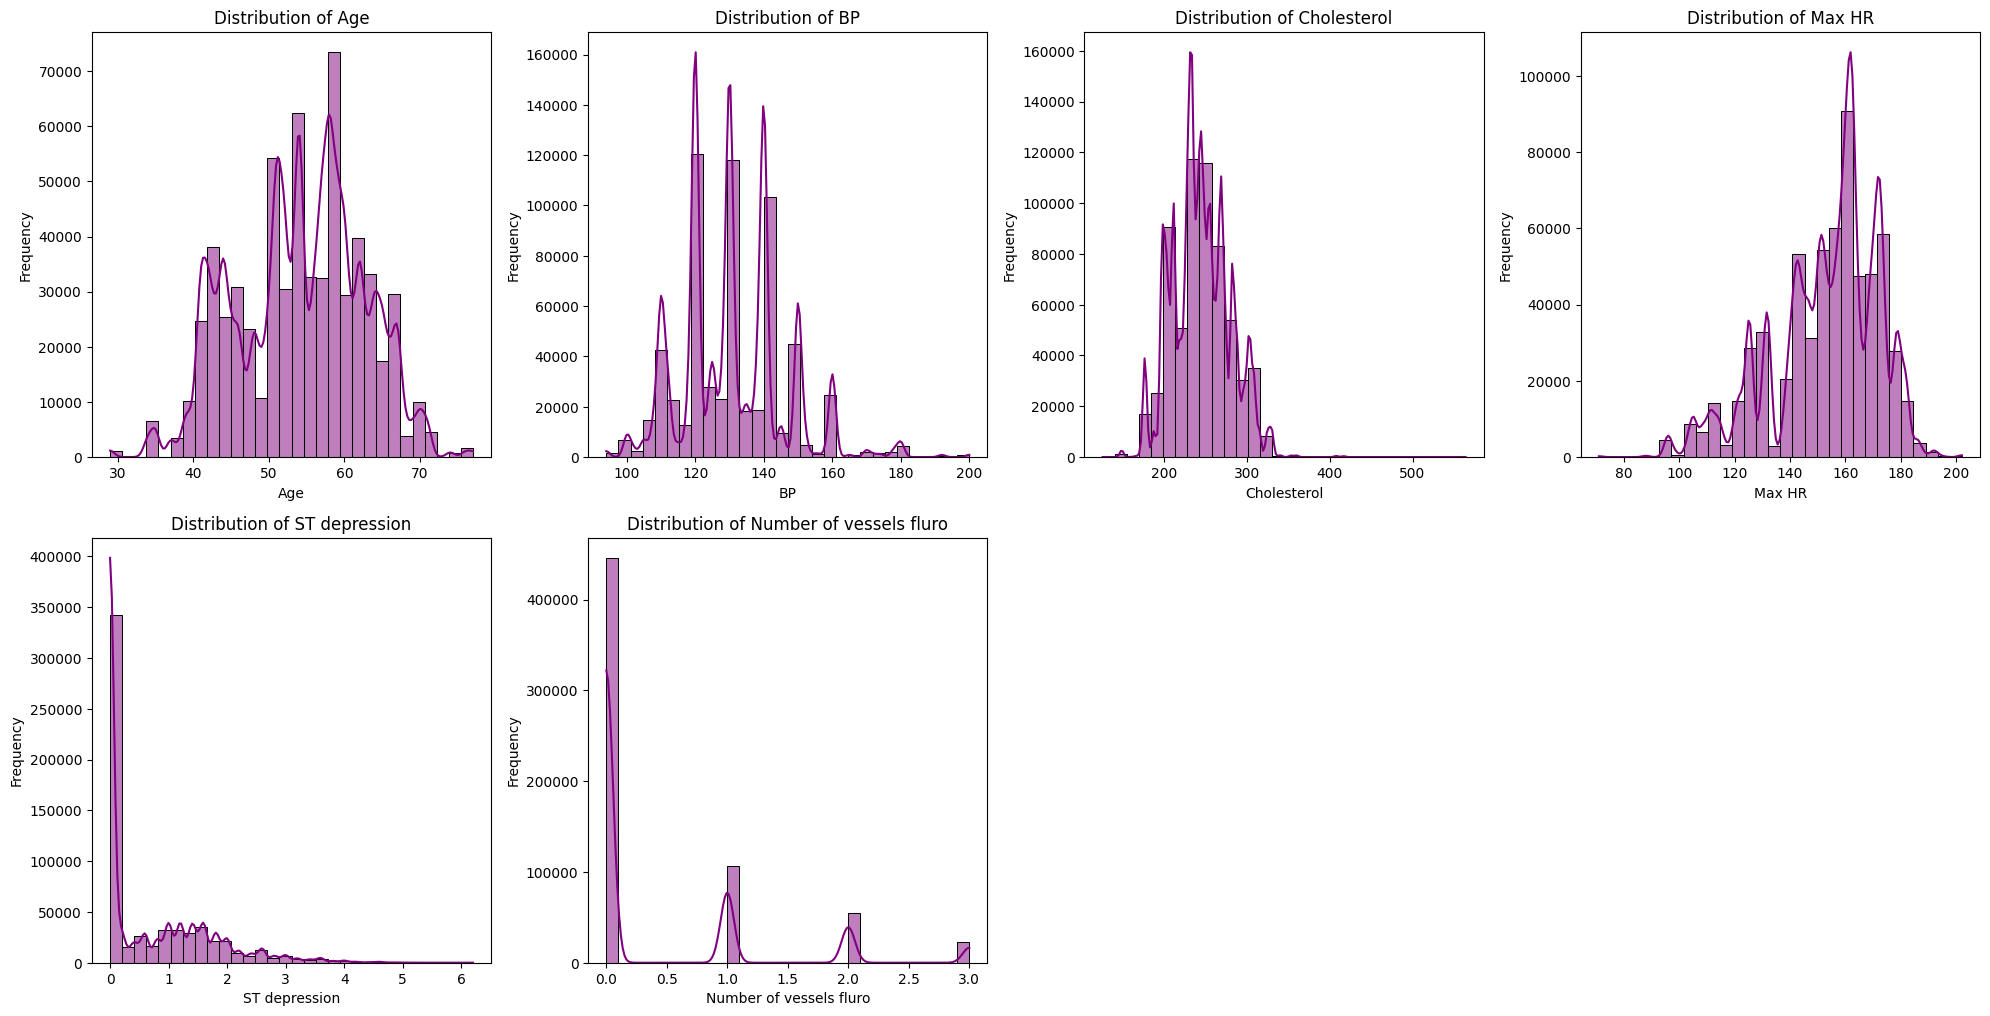

In [18]:
# carry out univariant analysis for numerical variable
plt.figure(figsize=(20, 25))

for i, col in enumerate(num_features):
    plt.subplot(5, 4, i + 1)

    sns.histplot(
        data=df_train,
        x=col,
        kde=True,
        bins=30,
        color='purple'   # or any single color
    )

    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


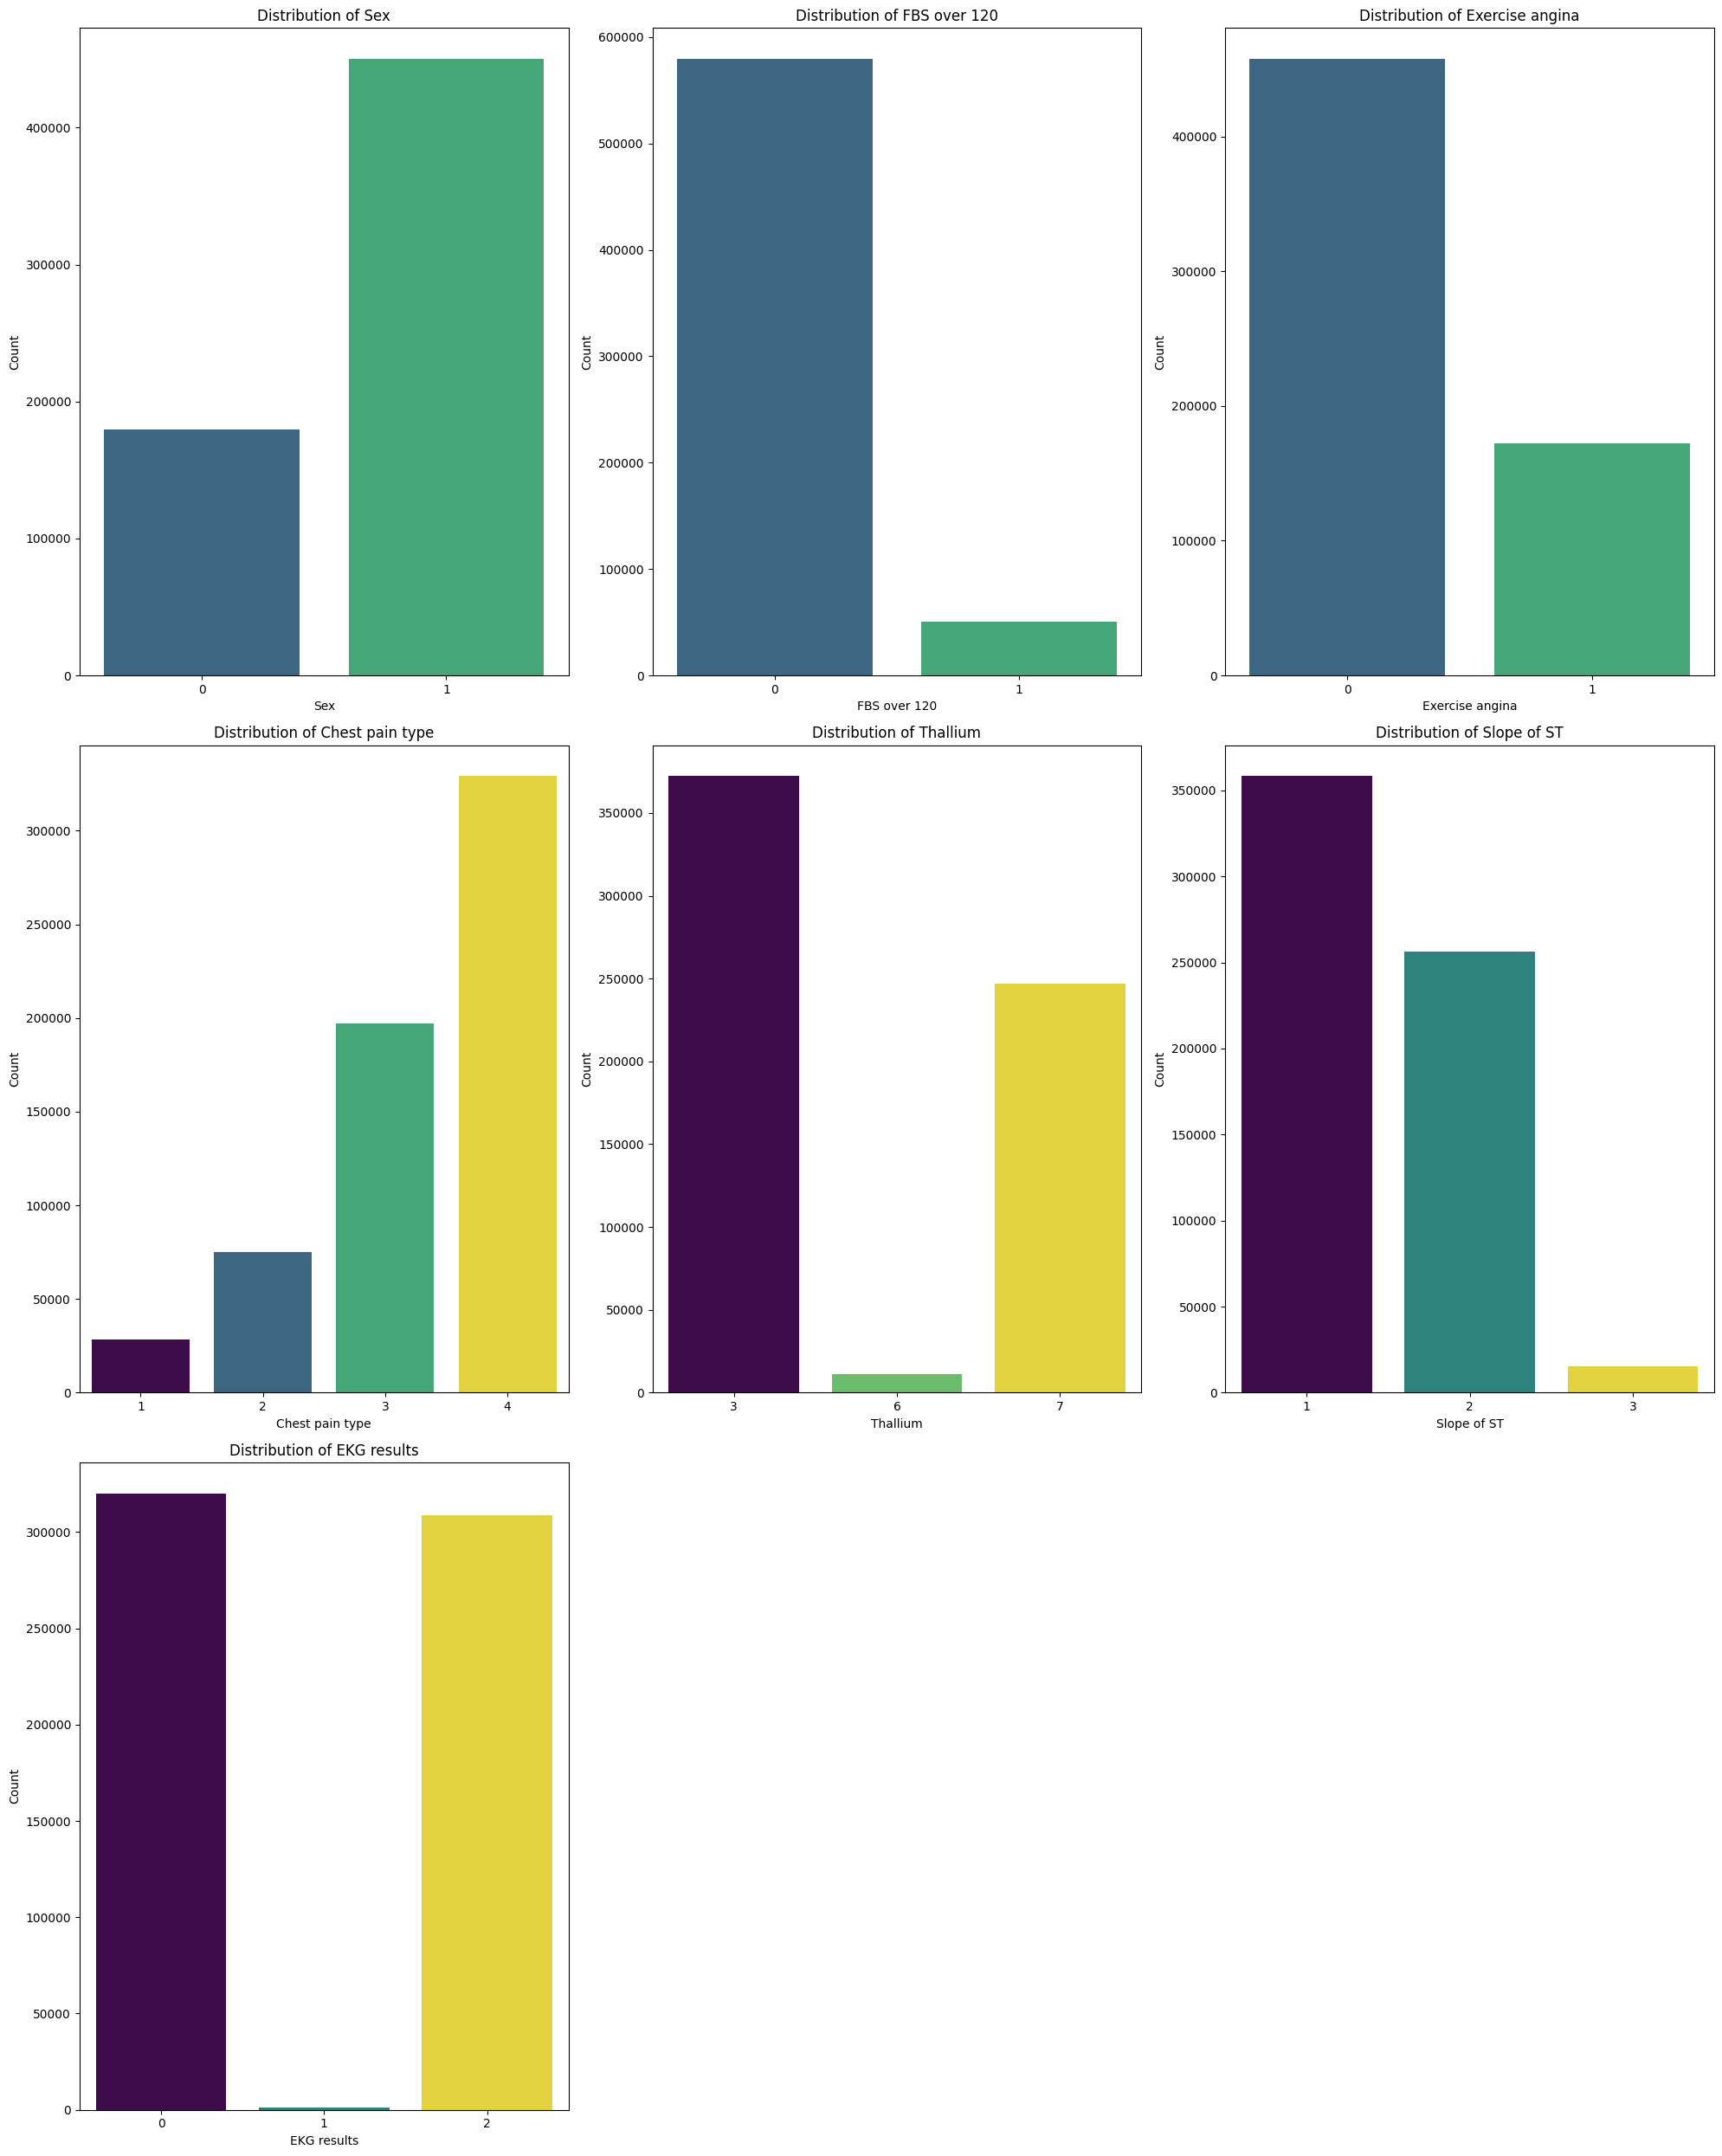

In [19]:
# carry out univariant analysis for categorical variable
plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_features):
    plt.subplot(3, 3, i + 1)

    sns.countplot(
        data=df_train,
        x=col,
        hue=col,
        palette='viridis',
        legend=False
    )

    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



**MODELLING**

In [20]:
# label my data
x = df_train.drop(['Heart Disease', 'id'], axis=1)
y = df_train['Heart Disease']


In [21]:
# Data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [22]:
# categorizing the data for modelling

num_features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

bin_features = [
    'Sex',
    'FBS over 120',
    'Exercise angina'
]

ord_features = [
    'Slope of ST',
    'EKG results'
]

nom_features = [
    'Chest pain type',
    'Thallium'
]


In [23]:
# train/split the variable

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('bin', 'passthrough', bin_features),
        ('ord', OrdinalEncoder(), ord_features),
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nom_features)
    ]
)


In [25]:
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [26]:
# model for logistic regression as baseline model

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [27]:
model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BP', 'Cholesterol',
                                                   'Max HR', 'ST depression',
                                                   'Number of vessels fluro']),
                                                 ('bin', 'passthrough',
                                                  ['Sex', 'FBS over 120',
                                                   'Exercise angina']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Slope of ST',
                                                   'EKG results']),
                                                 ('nom',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Chest pain type',
                                                   'Thallium'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [28]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

     Absence       0.89      0.91      0.90     69509
    Presence       0.88      0.86      0.87     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.88      0.88    126000
weighted avg       0.89      0.89      0.89    126000

ROC-AUC: 0.9533435322885602


In [29]:
# modeling for Random forest

from sklearn.ensemble import RandomForestClassifier


rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        max_depth=4,
        class_weight='balanced',
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    ))
])


In [30]:
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, rf_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))




              precision    recall  f1-score   support

     Absence       0.89      0.88      0.89     69509
    Presence       0.86      0.86      0.86     56491

    accuracy                           0.87    126000
   macro avg       0.87      0.87      0.87    126000
weighted avg       0.87      0.87      0.87    126000

Random Forest ROC-AUC: 0.9436068397357619


In [31]:
y_prob = rf_model.predict_proba(x_test)[:, 1]

# Map 'Absence' to 0 and 'Presence' to 1 for y_test
y_test_numeric = y_test.map({'Absence': 0, 'Presence': 1})

for t in [0.3, 0.4, 0.5]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test_numeric, y_pred_t))


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     69509
           1       0.72      0.96      0.82     56491

    accuracy                           0.81    126000
   macro avg       0.84      0.83      0.81    126000
weighted avg       0.85      0.81      0.81    126000


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     69509
           1       0.79      0.92      0.85     56491

    accuracy                           0.86    126000
   macro avg       0.86      0.86      0.86    126000
weighted avg       0.87      0.86      0.86    126000


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     69509
           1       0.86      0.86      0.86     56491

    accuracy                           0.87    126000
   macro avg       0.87      0.87      0.87    126000
weighted avg       0.87   

In [32]:
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Random Forest ROC-AUC: {roc_auc:.4f}")

Random Forest ROC-AUC: 0.9436


In [33]:
# Get feature names from the preprocessor
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()


In [34]:
import pandas as pd
import numpy as np

importances = rf_model.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(15)


,Feature,Importance
15,nom__Thallium_7,0.303144
13,nom__Chest pain type_4,0.217082
5,num__Number of vessels fluro,0.140209
8,bin__Exercise angina,0.098645
9,ord__Slope of ST,0.080867
3,num__Max HR,0.058994
4,num__ST depression,0.050589
12,nom__Chest pain type_3,0.022941
6,bin__Sex,0.017599
10,ord__EKG results,0.003402


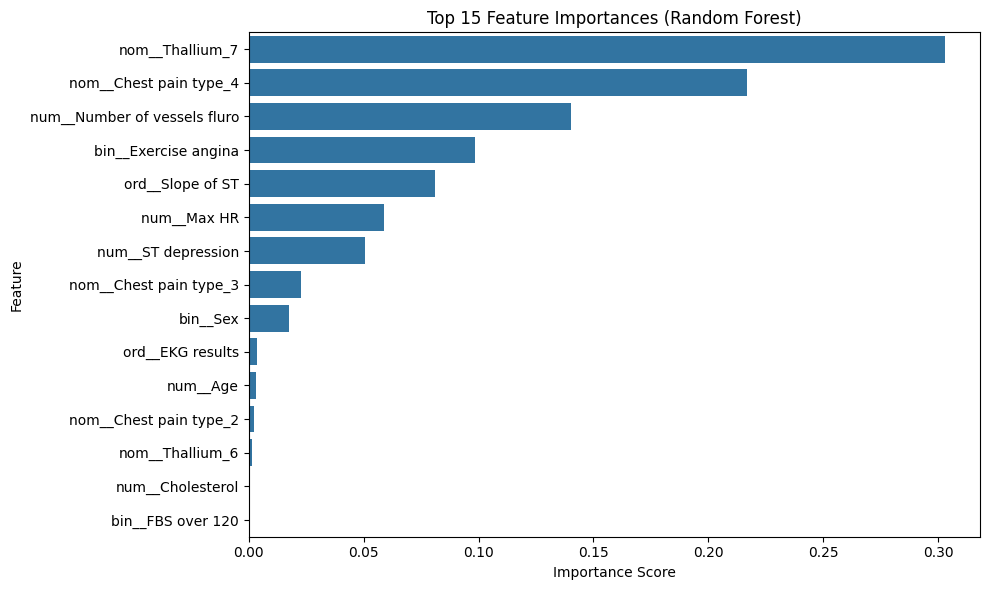

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(15),
    x='Importance',
    y='Feature'
)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


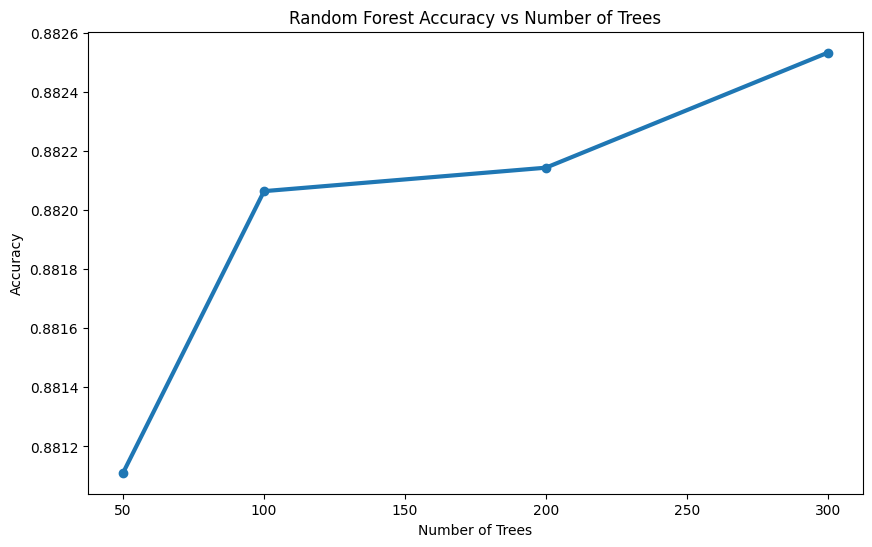

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

num_trees_list = [50, 100, 200, 300]
scores = []

for n in num_trees_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, class_weight='balanced', n_jobs=-1)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

# Now plot
plt.figure(figsize=(10,6))
plt.plot(num_trees_list, scores, marker='o', linewidth=3)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.show()


In [37]:
# modeling for xgboost

import xgboost as xgb


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:41:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Threshold: 0.3 ---
              precision    recall  f1-score   support

     Absence       0.93      0.84      0.88     69509
    Presence       0.82      0.92      0.87     56491

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000


--- Threshold: 0.4 ---
              precision    recall  f1-score   support

     Absence       0.91      0.88      0.90     69509
    Presence       0.86      0.90      0.88     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.89      0.89    126000
weighted avg       0.89      0.89      0.89    126000


--- Threshold: 0.5 ---
              precision    recall  f1-score   support

     Absence       0.89      0.91      0.90     69509
    Presence       0.88      0.87      0.88     56491

    accuracy                           0.89    126000
   macro avg       0.89      0.89      0.89    126000
we

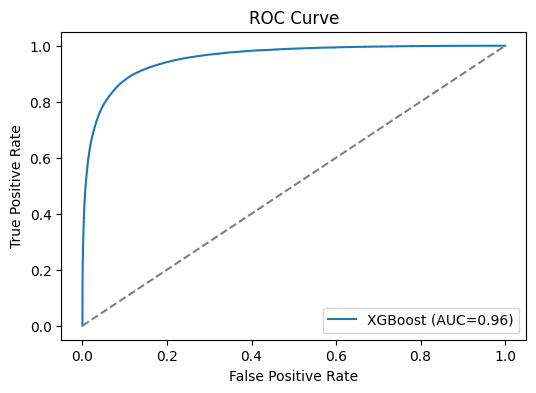

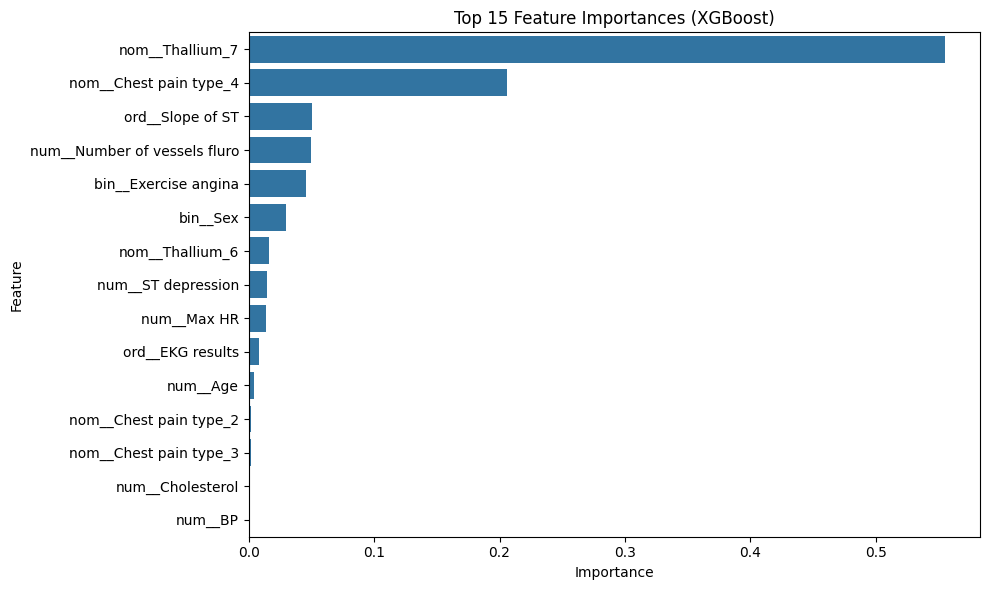

In [38]:
# ===============================
# XGBoost Pipeline for Heart Disease Prediction
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier

# -------------------------------
# 1. Define features
# -------------------------------
drop_cols = ['id']
target_col = 'Heart Disease'

num_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
bin_features = ['Sex', 'FBS over 120', 'Exercise angina']
ord_features = ['Slope of ST', 'EKG results']
nom_features = ['Chest pain type', 'Thallium']

# -------------------------------
# 2. Encode target
# -------------------------------
le = LabelEncoder()
y = le.fit_transform(df_train[target_col])  # 0 = Absence, 1 = Presence
X = df_train.drop(columns=[target_col] + drop_cols)

# -------------------------------
# 3. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 4. Preprocessing pipeline
# -------------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', bin_features),
    ('ord', OrdinalEncoder(), ord_features),
    ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nom_features)
])

# -------------------------------
# 5. XGBoost pipeline
# -------------------------------
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        scale_pos_weight=1,  # set >1 if Presence class is smaller
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1,
        random_state=42
    ))
])

# -------------------------------
# 6. Train model
# -------------------------------
xgb_pipeline.fit(X_train, y_train)

# -------------------------------
# 7. Predict probabilities
# -------------------------------
y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

# -------------------------------
# 8. Evaluate multiple thresholds
# -------------------------------
thresholds = [0.3, 0.4, 0.5]
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\n--- Threshold: {t} ---")
    print(classification_report(y_test, y_pred_t, target_names=le.classes_))

# -------------------------------
# 9. ROC-AUC
# -------------------------------
roc_auc = roc_auc_score(y_test, y_prob)
print(f"XGBoost ROC-AUC: {roc_auc:.4f}")

# -------------------------------
# 10. Plot ROC curve
# -------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# -------------------------------
# 11. Feature importance
# -------------------------------
feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = xgb_pipeline.named_steps['classifier'].feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [39]:
pip install shap

In [40]:
import shap

# Preprocess X_test using the pipeline's preprocessor
X_test_processed = xgb_pipeline.named_steps['preprocessor'].transform(X_test)

explainer = shap.Explainer(xgb_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_processed)

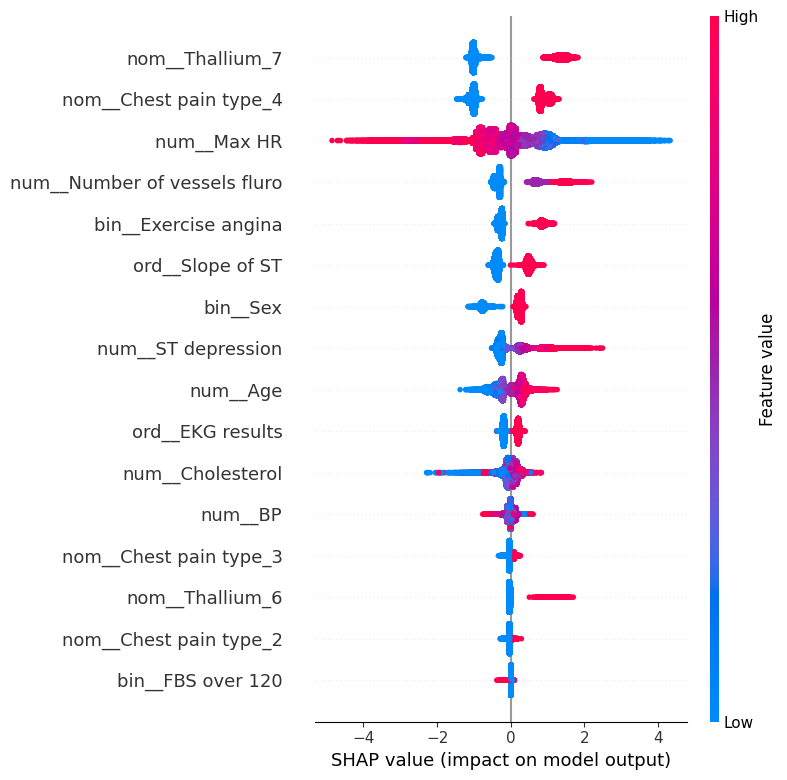

In [41]:
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

TEST FILE

In [59]:
# Use the test dataframe as-is (DO NOT preprocess manually)
X_new = df_test.copy()

# Predict probabilities using the trained XGBoost pipeline
y_new_prob = xgb_pipeline.predict_proba(X_new)[:, 1]

# Apply chosen threshold
threshold = 0.4
y_new_pred = (y_new_prob >= threshold).astype(int)


In [60]:
df_test['Heart_Disease_Probability'] = y_new_prob
df_test['Heart_Disease_Prediction'] = y_new_pred


In [61]:
print(df_test.columns)


Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart_Disease_Probability', 'Heart_Disease_Prediction'],
      dtype='object')


In [63]:
df_test[['Heart_Disease_Probability', 'Heart_Disease_Prediction']].head()



,Heart_Disease_Probability,Heart_Disease_Prediction
0,0.958634,1
1,0.009480,0
2,0.987104,1
3,0.006620,0
4,0.204239,0


In [64]:
df_test.head()


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease_Probability,Heart_Disease_Prediction
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3,0.958634,1
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3,0.009480,0
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7,0.987104,1
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3,0.006620,0
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7,0.204239,0


In [65]:
df_test.sort_values(
    by='Heart_Disease_Probability',
    ascending=False
).head(10)


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease_Probability,Heart_Disease_Prediction
216079,846079,65,1,4,108,261,0,2,96,1,0.0,2,2,7,0.999903,1
206857,836857,59,1,4,108,226,0,2,96,1,2.2,2,2,7,0.999902,1
189859,819859,61,1,4,130,256,0,2,96,1,2.2,2,2,7,0.999898,1
37815,667815,65,1,4,120,240,0,2,96,1,2.0,2,2,7,0.999895,1
67000,697000,66,1,4,130,197,0,2,95,1,2.4,2,2,7,0.999894,1
253850,883850,65,1,4,120,211,0,2,96,1,1.6,2,2,7,0.999894,1
111458,741458,61,1,4,109,211,0,2,96,1,2.2,2,2,7,0.999887,1
266318,896318,65,1,4,110,246,0,2,96,1,1.5,2,3,3,0.999886,1
181108,811108,59,1,4,102,304,0,2,96,1,1.6,2,3,7,0.999883,1
16006,646006,65,1,4,110,274,1,0,95,1,1.6,2,3,7,0.999876,1


In [66]:
df_test['Heart_Disease_Prediction_Label'] = le.inverse_transform(
    df_test['Heart_Disease_Prediction']
)


In [67]:
df_test[['Heart_Disease_Probability', 'Heart_Disease_Prediction_Label']].head()


,Heart_Disease_Probability,Heart_Disease_Prediction_Label
0,0.958634,Presence
1,0.009480,Absence
2,0.987104,Presence
3,0.006620,Absence
4,0.204239,Absence


In [68]:
df_submission.head()

,id,Heart Disease
0,630000,0
1,630001,0
2,630002,0
3,630003,0
4,630004,0


In [69]:
df_submission.columns

Index(['id', 'Heart Disease'], dtype='object')

In [71]:
df_submission['id'].equals(df_test['id'])


True

In [74]:

df_submission['Heart Disease'] = y_new_pred

df_submission.head()


,id,Heart Disease
0,630000,1
1,630001,0
2,630002,1
3,630003,0
4,630004,0


In [75]:
df_submission.isna().sum()
df_submission.shape
df_submission.head(10)


,id,Heart Disease
0,630000,1
1,630001,0
2,630002,1
3,630003,0
4,630004,0
5,630005,1
6,630006,0
7,630007,1
8,630008,1
9,630009,0


In [77]:
df_submission.to_csv('submission.csv', index=False)
